In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import common
## what the heck this do
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# The CNN

In [8]:
# Define the CNN
# Takes in a 3 channel
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=2) # Padding to preserve 32x32
        self.pool = nn.MaxPool2d(2, 2) # 16x16
        self.conv2 = nn.Conv2d(32, 64, 5, padding=2) # 16x16, max pool to 8x8
        self.conv3 = nn.Conv2d(64, 128, 5, padding=2) # 8x8, max pool to 4x4
        self.conv_dropout = nn.Dropout2d(.2)
        self.dropout = nn.Dropout()
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.conv_dropout(x) # dropout at end
        x = torch.flatten(x, 1) # dont flatten batch, a1
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

net = Net()

In [5]:
import torchvision
from torchview import draw_graph

# Get the shape of a single sample and add batch dimension
sample_image, _ = trainset[0]
input_shape = (1,) + sample_image.shape

# get on batch to see size
model_graph = draw_graph(net, input_size=input_shape, expand_nested=True)
model_graph.visual_graph

TypeError: img should be PIL Image. Got <class 'tuple'>

# The Tests

Using device: cuda:0
[1,   500] loss: 1.822
Epoch 1 - Train Acc: 0.4963, Val Acc: 0.4977
[2,   219] loss: 0.622
[2,   719] loss: 1.328
Epoch 2 - Train Acc: 0.5857, Val Acc: 0.5763
[3,   438] loss: 1.074
Epoch 3 - Train Acc: 0.6287, Val Acc: 0.6151
[4,   157] loss: 0.353
[4,   657] loss: 1.112
Epoch 4 - Train Acc: 0.6686, Val Acc: 0.6517
[5,   376] loss: 0.789
Epoch 5 - Train Acc: 0.6679, Val Acc: 0.6438
[6,    95] loss: 0.195
[6,   595] loss: 1.009
Epoch 6 - Train Acc: 0.6857, Val Acc: 0.6706
[7,   314] loss: 0.610
Epoch 7 - Train Acc: 0.7072, Val Acc: 0.6795
[8,    33] loss: 0.061
[8,   533] loss: 0.947
Epoch 8 - Train Acc: 0.7046, Val Acc: 0.6771
[9,   252] loss: 0.465
[9,   752] loss: 0.930
Epoch 9 - Train Acc: 0.7190, Val Acc: 0.6936
[10,   471] loss: 0.856
Epoch 10 - Train Acc: 0.7199, Val Acc: 0.6848
[11,   190] loss: 0.333
[11,   690] loss: 0.885
Epoch 11 - Train Acc: 0.7393, Val Acc: 0.7032
[12,   409] loss: 0.711
Epoch 12 - Train Acc: 0.7496, Val Acc: 0.7149


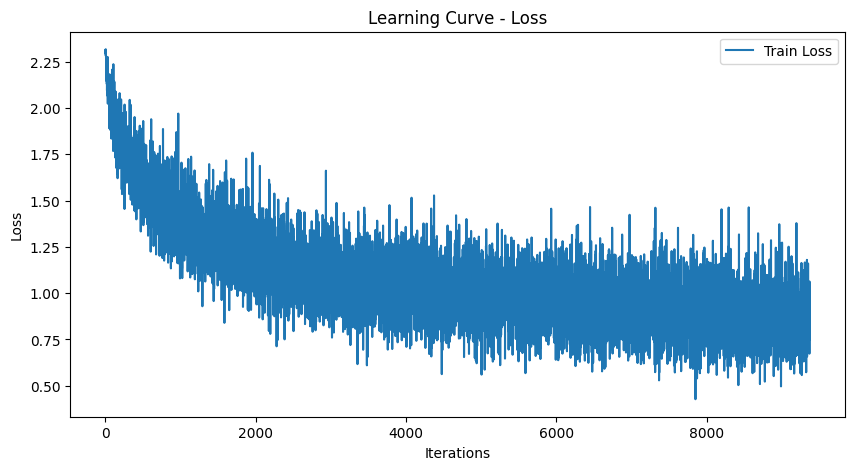

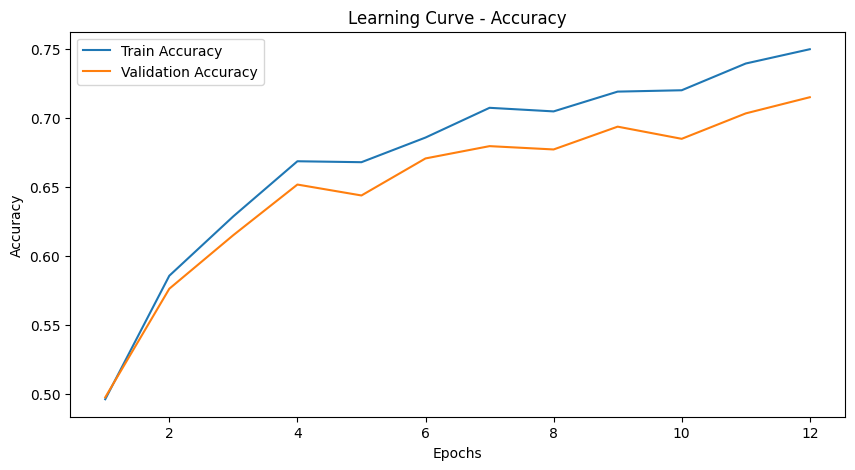

Final Training Accuracy: 0.74964
Final Validation Accuracy: 0.7149


In [12]:
model = Net()
common.train(model, trainset, testset, learning_rate=0.001, optimizer="adam", num_epochs=12, batch_size=64)

# Trying new transforms 

In [13]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Using device: cuda:0
[1,   500] loss: 1.588
Epoch 1 - Train Acc: 0.6166, Val Acc: 0.6136
[2,   219] loss: 0.506
[2,   719] loss: 1.067
Epoch 2 - Train Acc: 0.6943, Val Acc: 0.6787
[3,   438] loss: 0.828
Epoch 3 - Train Acc: 0.7381, Val Acc: 0.7206
[4,   157] loss: 0.268
[4,   657] loss: 0.848
Epoch 4 - Train Acc: 0.7539, Val Acc: 0.7224
[5,   376] loss: 0.589
Epoch 5 - Train Acc: 0.7585, Val Acc: 0.7207
[6,    95] loss: 0.141
[6,   595] loss: 0.729
Epoch 6 - Train Acc: 0.7933, Val Acc: 0.7469
[7,   314] loss: 0.433
Epoch 7 - Train Acc: 0.8082, Val Acc: 0.7575
[8,    33] loss: 0.045
[8,   533] loss: 0.668
Epoch 8 - Train Acc: 0.8168, Val Acc: 0.7580
[9,   252] loss: 0.319
[9,   752] loss: 0.644
Epoch 9 - Train Acc: 0.8156, Val Acc: 0.7526
[10,   471] loss: 0.571
Epoch 10 - Train Acc: 0.8317, Val Acc: 0.7636
[11,   190] loss: 0.223
[11,   690] loss: 0.602
Epoch 11 - Train Acc: 0.8485, Val Acc: 0.7767
[12,   409] loss: 0.469
Epoch 12 - Train Acc: 0.8404, Val Acc: 0.7681


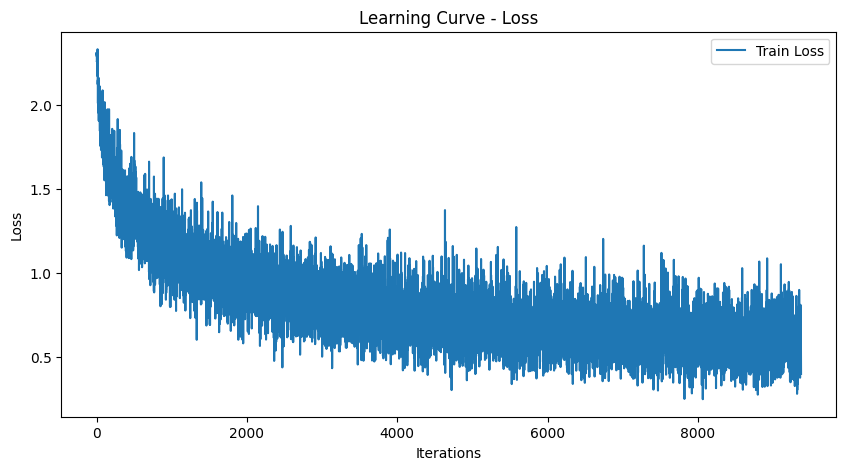

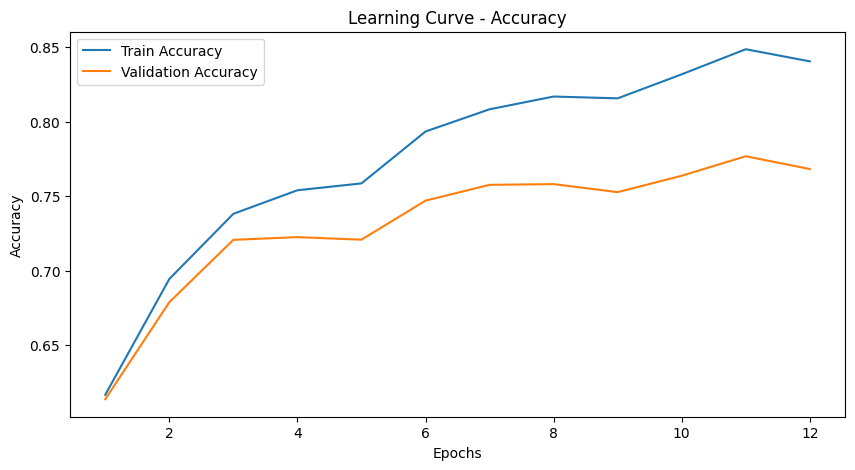

Final Training Accuracy: 0.8404
Final Validation Accuracy: 0.7681


In [15]:
model = Net()
common.train(model, trainset, testset, learning_rate=0.001, optimizer="adam", num_epochs=12, batch_size=64)

In [19]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Using device: cuda:0
[1,   500] loss: 1.694
Epoch 1 - Train Acc: 0.5340, Val Acc: 0.5315
[2,   219] loss: 0.585
[2,   719] loss: 1.256
Epoch 2 - Train Acc: 0.6066, Val Acc: 0.5949
[3,   438] loss: 1.019
Epoch 3 - Train Acc: 0.6539, Val Acc: 0.6370
[4,   157] loss: 0.342
[4,   657] loss: 1.057
Epoch 4 - Train Acc: 0.6814, Val Acc: 0.6660
[5,   376] loss: 0.754
Epoch 5 - Train Acc: 0.7022, Val Acc: 0.6865
[6,    95] loss: 0.180
[6,   595] loss: 0.954
Epoch 6 - Train Acc: 0.7102, Val Acc: 0.6902
[7,   314] loss: 0.579
Epoch 7 - Train Acc: 0.7228, Val Acc: 0.6997
[8,    33] loss: 0.060
[8,   533] loss: 0.900
Epoch 8 - Train Acc: 0.7368, Val Acc: 0.7130
[9,   252] loss: 0.448
[9,   752] loss: 0.887
Epoch 9 - Train Acc: 0.7436, Val Acc: 0.7181
[10,   471] loss: 0.807
Epoch 10 - Train Acc: 0.7504, Val Acc: 0.7251
[11,   190] loss: 0.316
[11,   690] loss: 0.852
Epoch 11 - Train Acc: 0.7481, Val Acc: 0.7156
[12,   409] loss: 0.681
Epoch 12 - Train Acc: 0.7519, Val Acc: 0.7140
[13,   128] loss: 

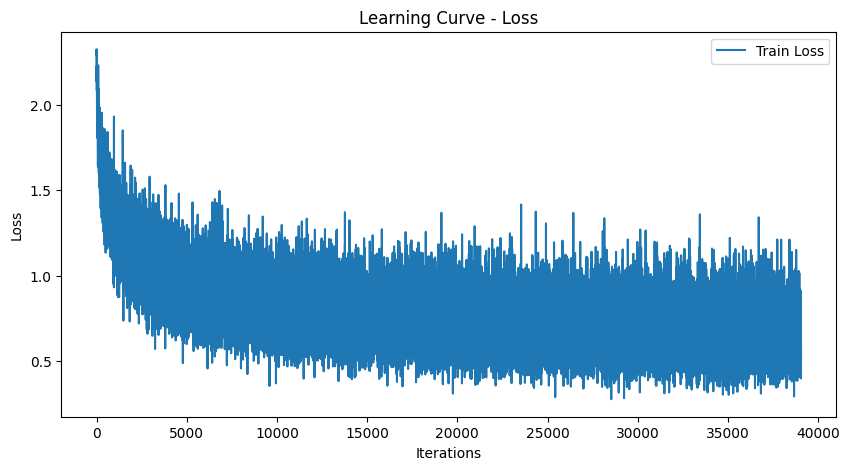

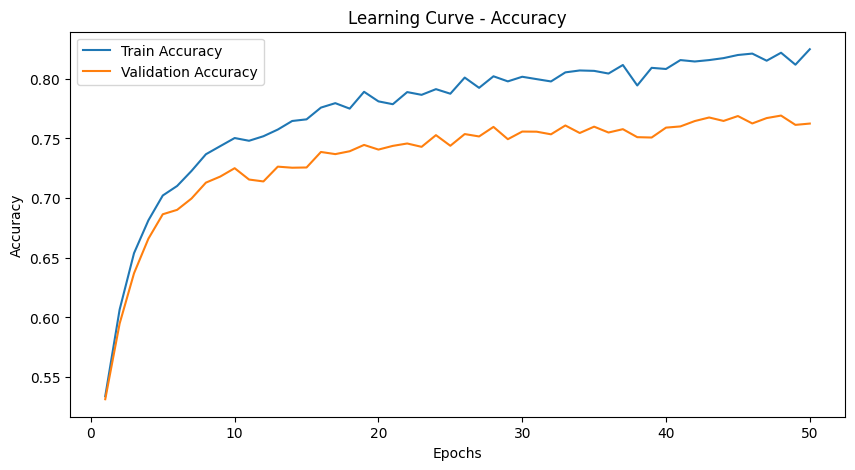

Final Training Accuracy: 0.8248
Final Validation Accuracy: 0.7625


In [20]:
model = Net()
common.train(model, trainset, testset, learning_rate=0.001, optimizer="adam", num_epochs=50, batch_size=64)